<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/90_Lite_Optimizers_lesson_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite

Макс 10 баллов

1) Постройте график функции np.sin(x) - 0.3*x для x от -5 до 5;

2) Постройте график производной данной функции;

3) Используя алгоритм градиентного спуска и оптимизатор Adagrad, найдите глобальный минимум данной функции на промежутке от -5 до 5, начав из точки x=-4. Продемонстрируйте работу алгоритма на графике.


In [68]:
import numpy as np

from matplotlib import pyplot as plt

In [69]:
# Зададим функцию и точки к ней
x = np.linspace(-5, 5, 1000)
def f(x):
  return np.sin(x) -0.3*x 

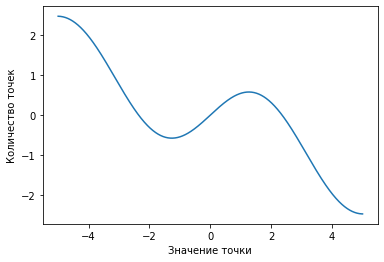

In [70]:
plt.plot(x, f(x)) # изображение полученных точек
plt.xlabel("Значение точки")
plt.ylabel("Количество точек")
plt.show()

In [71]:
def derivative(func, value, step = 1): # функция для поиска производной в точке функции
    return (func(value + step) - func(value)) / step

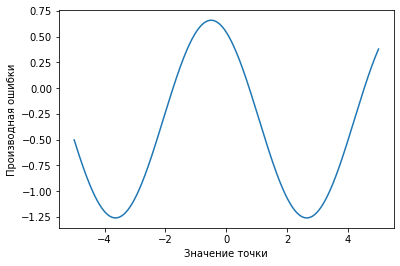

In [72]:
plt.plot(x, derivative(f, x, 1)) # изображаем кривую ошибки
plt.xlabel("Значение точки")
plt.ylabel("Производная ошибки")
plt.show()

## Adagrad

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4023

In [ ]:
class Adagrad:
    def __init__(self, eps = 1e-06):
        self.cache = 0
        self.eps = eps

    def apply_grad(self, x, dx, learning_rate):
        self.cache = self.cache + dx ** 2 # добавление новой информации в кэш
        adapted_lr = learning_rate / (self.cache + self.eps) ** 0.5 # уменьшение шага в разных направлениях в зависимости от кэша
        return x - adapted_lr * dx 

In [83]:
adagrad = Adagrad() # создаём оптимизатор Адаград

initial_estimator = -4 # берём случайную точку для начала поиска минимума 
current_estimator = initial_estimator
estim_log = []
values_log = []

learning_steps = 20
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(f, current_estimator, step=5) # Увеличим шаг производной step=5 (это расстояние от точки х до ее производной точки)
    current_estimator = adagrad.apply_grad(current_estimator, # делаем шаг оптимизатора Адаград 
                                           derivative_val,
                                           learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(f(current_estimator))

In [79]:
def draw_trajectory(x, f, estim_log, values_log):
    plt.plot(x, f) # изображаем кривую ошибки
    plt.plot(estim_log, values_log, marker='o') # изхображаем значения, через которые прошёл наш оптимизатор
    plt.legend(["Функция ошибки", "Путь оптимизатора"])
    plt.xlabel("Значение точки")
    plt.ylabel("Значение ошибки")
    plt.show()

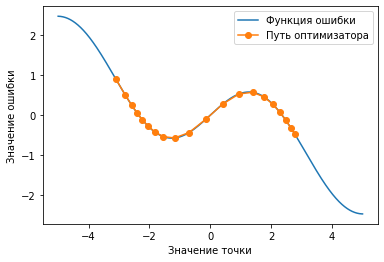

In [80]:
draw_trajectory(x, f(x), estim_log, values_log)

In [ ]:
ada_last = round(values_log[-1], 2)